# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Briliona
- **Email:** briliona1485@gmail.com
- **ID Dicoding:** briliona_1201

## Menentukan Pertanyaan Bisnis

- Di bulan apa penyewaan sepeda paling banyak dan paling sedikit?
- Bagaimana performa penyewaan sepeda dalam beberapa tahun terakhir?
- Di musim apa penyewaan sepeda paling sedikit?
- Penyewa sepeda mana yang lebih banyak, registered atau casual?

## Import Semua Packages/Library yang Digunakan

In [87]:
#Import semua library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [88]:
#load tabel day
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [89]:
#load tabel hour
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- **Dataset day.csv dan hour.csv:** Menyediakan data penyewaan sepeda per hari dan per jam, termasuk faktor cuaca, hari kerja/libur, dan musim.
- **Analisis Musiman:** Kolom season memungkinkan analisis tren penyewaan di setiap musim.
- **Pengaruh Hari Kerja/Libur:** Kolom `workingday` (1 untuk hari kerja, 0 untuk akhir pekan/libur), `holiday` (indikator hari libur), dan `weekday` (0=minggu, 6=sabtu) membantu menganalisis pola penyewaan berdasarkan jenis hari.
- **Faktor Cuaca:** Kolom cuaca (temp, hum, dll.) membantu memahami pengaruh cuaca terhadap penyewaan.
- **Pengguna Kasual vs Terdaftar:** Kolom casual dan registered menunjukkan perbedaan penyewaan antara pengguna kasual dan terdaftar.

### Assessing Data

**Menilai Tabel day_df**

In [90]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [91]:
#Cek missing value day_df
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [92]:
# Cek duplicate day_df
print("Jumlah duplikasi: ",day_df.duplicated().sum())

Jumlah duplikasi:  0


In [93]:
# Cek parameter statistik
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Menilai Tabel hour_df**

In [94]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [95]:
#Cek missing value hour_df
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [96]:
# Cek duplicate hour_df
print("Jumlah duplikasi: ",hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [97]:
# Cek parameter statistik
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- **Tidak ada** kesalahan missing value, duplicate data, inaccurate value pada kedua tabel
- **Ada** kesalahan tipe data yaitu dteday harusnya datetime bukan object 

### Cleaning Data

1. Memperbaiki tipe data dteday jadi datetime

In [98]:
datetime_columns = ["dteday"]
dataframes = [day_df, hour_df]

for df in dataframes:
    for column in datetime_columns:
        if column in df.columns:  
            df[column] = pd.to_datetime(df[column])

In [99]:
day_df.info()
hour_df.info()
#sudah berhasil diubah menjadi datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

2. Menghapus tabel yang tidak diperlukan

In [100]:
#Tabel hour_df dihapus karena tidak relevan dengan pertanyaan bisnis. Selain itu, tabel hour_df hanya berbeda di kolom hr saja, sedangkan sisanya sama dengan tabel day.
del hour_df

3. Menghapus kolom yang tidak diperlukan

Kolom yang dihapus karena tidak diperlukan adalah:

- instant: Tidak memberikan informasi tambahan yang relevan dengan pertanyaan.
- holiday: Pertanyaan bisnis tidak mempertimbangkan perbedaan penyewaan pada hari libur.
- weekday: Pertanyaan tidak membutuhkan analisis perbedaan penyewaan berdasarkan hari dalam seminggu.
- workingday: Pertanyaan tidak mempertimbangkan apakah hari tersebut adalah hari kerja atau bukan.
- temp, atemp, hum, windspeed, weathersit: Pertanyaan tidak mempertimbangkan pengaruh cuaca atau kondisi lingkungan pada penyewaan sepeda.

In [101]:
# Menghapus kolom yang tidak diperlukan
day_df.drop(columns=['instant', 'holiday', 'weekday', 'workingday','weathersit', 'temp', 'atemp', 'hum', 'windspeed'], inplace=True)
day_df.head()

,dteday,season,yr,mnth,casual,registered,cnt
0,2011-01-01,1,0,1,331,654,985
1,2011-01-02,1,0,1,131,670,801
2,2011-01-03,1,0,1,120,1229,1349
3,2011-01-04,1,0,1,108,1454,1562
4,2011-01-05,1,0,1,82,1518,1600


4. Rename

In [102]:
# Mengubah nama kolom agar lebih jelas di dalam dataset day_df
day_df.rename(columns={'yr': 'year', 'mnth': 'month', 'cnt': 'count'}, inplace=True)

# Mengonversi nilai dalam kolom agar lebih mudah dipahami
# Mengganti nilai kolom season: 1 menjadi Spring, 2 menjadi Summer, 3 menjadi Fall, dan 4 menjadi Winter
day_df['season'] = day_df['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

# Mengubah nilai kolom month: 1 menjadi Jan, 2 menjadi Feb, dan seterusnya hingga 12 menjadi Dec
day_df['month'] = day_df['month'].replace({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

# Mengonversi nilai kolom year: 0 menjadi 2011 dan 1 menjadi 2012
day_df['year'] = day_df['year'].replace({0: '2011', 1: '2012'})

# Menampilkan 5 baris pertama dari DataFrame
day_df.head()

,dteday,season,year,month,casual,registered,count
0,2011-01-01,Spring,2011,Jan,331,654,985
1,2011-01-02,Spring,2011,Jan,131,670,801
2,2011-01-03,Spring,2011,Jan,120,1229,1349
3,2011-01-04,Spring,2011,Jan,108,1454,1562
4,2011-01-05,Spring,2011,Jan,82,1518,1600


**Insight:**

Pada tahap cleaning dilakukan:
- Mengubah Tipe Data: 
- Menghapus Kolom yang Tidak Diperlukan
- Menghapus Data yang Tidak Diperlukan
- Memberi Nama Kolom yang Lebih Sesuai

## Exploratory Data Analysis (EDA)

### Explore data day_df

In [103]:
# rangkuman parameter statistik
day_df.describe(include="all")

,dteday,season,year,month,casual,registered,count
count,731,731,731,731,731.000000,731.000000,731.000000
unique,NaN,4,2,12,NaN,NaN,NaN
top,NaN,Fall,2012,Jan,NaN,NaN,NaN
freq,NaN,188,366,62,NaN,NaN,NaN
mean,2012-01-01 00:00:00,NaN,NaN,NaN,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,NaN,NaN,NaN,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,NaN,NaN,NaN,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,NaN,NaN,NaN,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,NaN,NaN,NaN,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,3410.000000,6946.000000,8714.000000


Dataset ini terdiri dari 731 entri dengan rata-rata penyewaan harian sebesar 4504, di mana penyewa registered mendominasi dengan rata-rata 3656 dibandingkan penyewa casual yang rata-ratanya 848. Penyewaan tertinggi terjadi pada musim Fall di tahun 2012, dengan bulan Jan sebagai bulan yang paling sering muncul. Nilai standar deviasi yang besar (1937 untuk total penyewaan) menunjukkan adanya variasi signifikan dalam jumlah penyewaan harian. Rentang nilai menunjukkan penyewaan harian minimum sebesar 22 dan maksimum 8714, dengan kuartil median di angka 4548.

In [104]:
#Kelompokkan penyewa sepeda berdasarkan season
day_df.groupby(by='season').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                            
         max   min         mean      sum
season                                  
Fall    8714  1115  5644.303191  1061129
Spring  7836   431  2604.132597   471348
Summer  8362   795  4992.331522   918589
Winter  8555    22  4728.162921   841613

Tabel menunjukkan bahwa musim **Fall** memiliki jumlah penyewaan sepeda tertinggi dengan total 1,061,129 dan rata-rata harian 5644, diikuti oleh **Summer** dan **Winter**. Musim **Spring** memiliki jumlah penyewaan terendah, baik dalam total (471,348) maupun rata-rata harian (2604). Penyewaan harian tertinggi terjadi di **Fall** (8714), sementara penyewaan harian terendah tercatat di **Winter** (22), menunjukkan variasi yang signifikan antar musim.

In [105]:
#Kelompokkan penyewa sepeda berdasarkan tahun
day_df.groupby(by='year').agg({
    'registered': 'sum', 'casual': 'sum', 'count':'sum'
})


,registered,casual,count
year,,,
2011,995851,247252,1243103
2012,1676811,372765,2049576


Tabel menunjukkan data penggunaan layanan pada tahun 2011 dan 2012. Terjadi peningkatan yang signifikan dalam jumlah pengguna terdaftar dari 995,851 pada tahun 2011 menjadi 1,676,811 pada tahun 2012, meningkat sekitar 68%. Pengguna kasual juga naik dari 247,252 menjadi 372,765, meningkat sekitar 51%. Total keseluruhan penggunaan layanan bertambah dari 1,243,103 pada 2011 menjadi 2,049,576 pada 2012, mengalami peningkatan sebesar 65%. Ini menunjukkan tren peningkatan popularitas layanan di kalangan pengguna terdaftar dan kasual.

In [106]:
day_df.groupby(by='month').agg({
    'count': ['max', 'min', 'mean', 'sum']
}).sort_values(by=('count', 'sum'), ascending=False)

count                           
        max   min         mean     sum
month                                 
Aug    7865  1115  5664.419355  351194
Jun    8120  3767  5772.366667  346342
Sep    8714  1842  5766.516667  345991
Jul    8173  3285  5563.677419  344948
May    8294  2633  5349.774194  331686
Oct    8156    22  5199.225806  322352
Apr    7460   795  4484.900000  269094
Nov    6852  1495  4247.183333  254831
Mar    8362   605  3692.258065  228920
Dec    6606   441  3403.806452  211036
Feb    5062  1005  2655.298246  151352
Jan    4521   431  2176.338710  134933

Bulan dengan total tertinggi adalah Agustus (351,194), sedangkan Januari memiliki total terendah (134,933). Secara umum, periode antara Mei hingga Oktober cenderung memiliki nilai rata-rata dan total lebih tinggi dibandingkan dengan periode lainnya, yang mungkin mengindikasikan adanya peningkatan aktivitas atau permintaan selama bulan-bulan tersebut.

**Insight:**
Selesai melakukan eksplorasi terhadap dataset. 

## Visualization & Explanatory Analysis

### Pertanyaan 1: Di bulan apa penyewaan sepeda paling banyak dan paling sedikit?

Bulan dengan penyewaan terbanyak: Aug dengan jumlah penyewaan 351194
Bulan dengan penyewaan tersedikit: Jan dengan jumlah penyewaan 134933


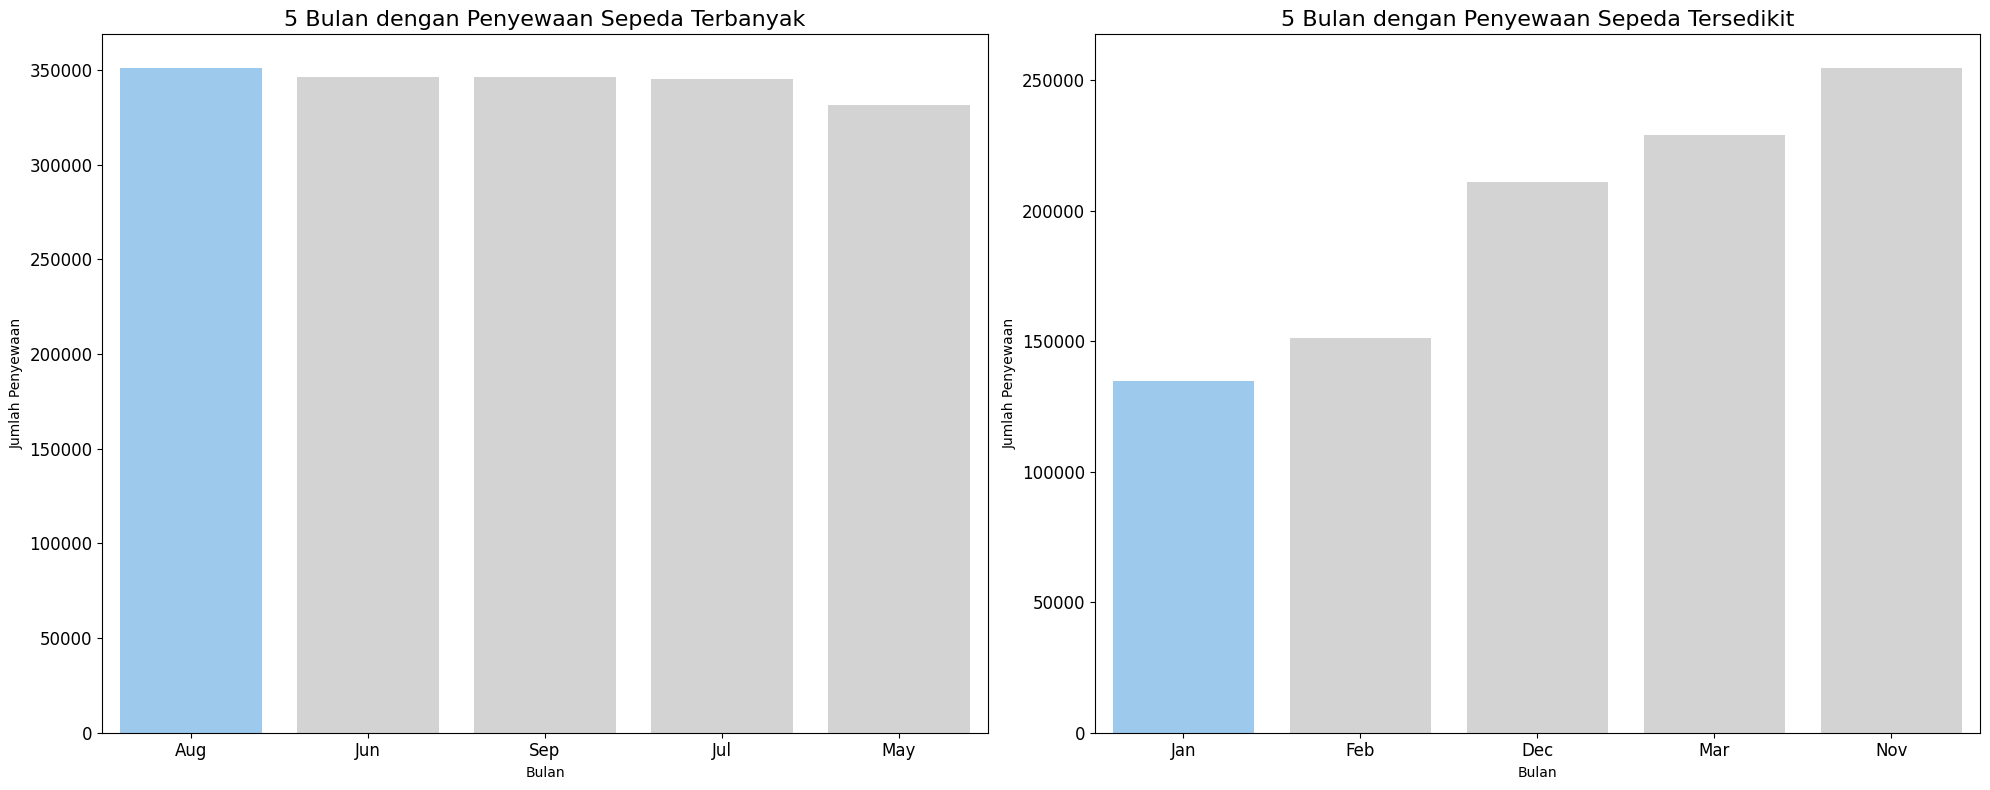

In [107]:
# Melakukan grouping terhadap kolom 'month' untuk mendapatkan total penyewaan per bulan
monthly_rentals = day_df.groupby("month")["count"].sum().sort_values(ascending=False).reset_index()

# Mencetak bulan dengan penyewaan terbanyak dan tersedikit
most_rented_month = monthly_rentals.iloc[0]
least_rented_month = monthly_rentals.iloc[-1]

print(f"Bulan dengan penyewaan terbanyak: {most_rented_month['month']} dengan jumlah penyewaan {most_rented_month['count']}")
print(f"Bulan dengan penyewaan tersedikit: {least_rented_month['month']} dengan jumlah penyewaan {least_rented_month['count']}")

# Membuat visualisasi bar plot untuk bulan dengan penyewaan terbanyak dan tersedikit
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Membuat barplot untuk 5 bulan dengan penyewaan terbanyak
sns.barplot(x="month", y="count", hue="month", data=monthly_rentals.head(5), palette=["#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"], ax=ax[0], legend=False)

# Mengatur label dan judul untuk subplot pertama (penyewaan terbanyak)
ax[0].set_ylabel("Jumlah Penyewaan")
ax[0].set_xlabel("Bulan")
ax[0].set_title("5 Bulan dengan Penyewaan Sepeda Terbanyak", fontsize=16)
ax[0].tick_params(axis='y', labelsize=12)
ax[0].tick_params(axis='x', labelsize=12)

# Membuat barplot untuk 5 bulan dengan penyewaan tersedikit
sns.barplot(x="month", y="count", hue="month", data=monthly_rentals.tail(5).sort_values(by="count", ascending=True), palette=["#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"], ax=ax[1], legend=False)

# Mengatur label dan judul untuk subplot kedua (penyewaan tersedikit)
ax[1].set_ylabel("Jumlah Penyewaan")
ax[1].set_xlabel("Bulan")
ax[1].set_title("5 Bulan dengan Penyewaan Sepeda Tersedikit", fontsize=16)
ax[1].tick_params(axis='y', labelsize=12)
ax[1].tick_params(axis='x', labelsize=12)

# Menampilkan plot
plt.tight_layout()
plt.show()

### Pertanyaan 2: Bagaimana performa penyewaan sepeda dalam beberapa tahun terakhir?

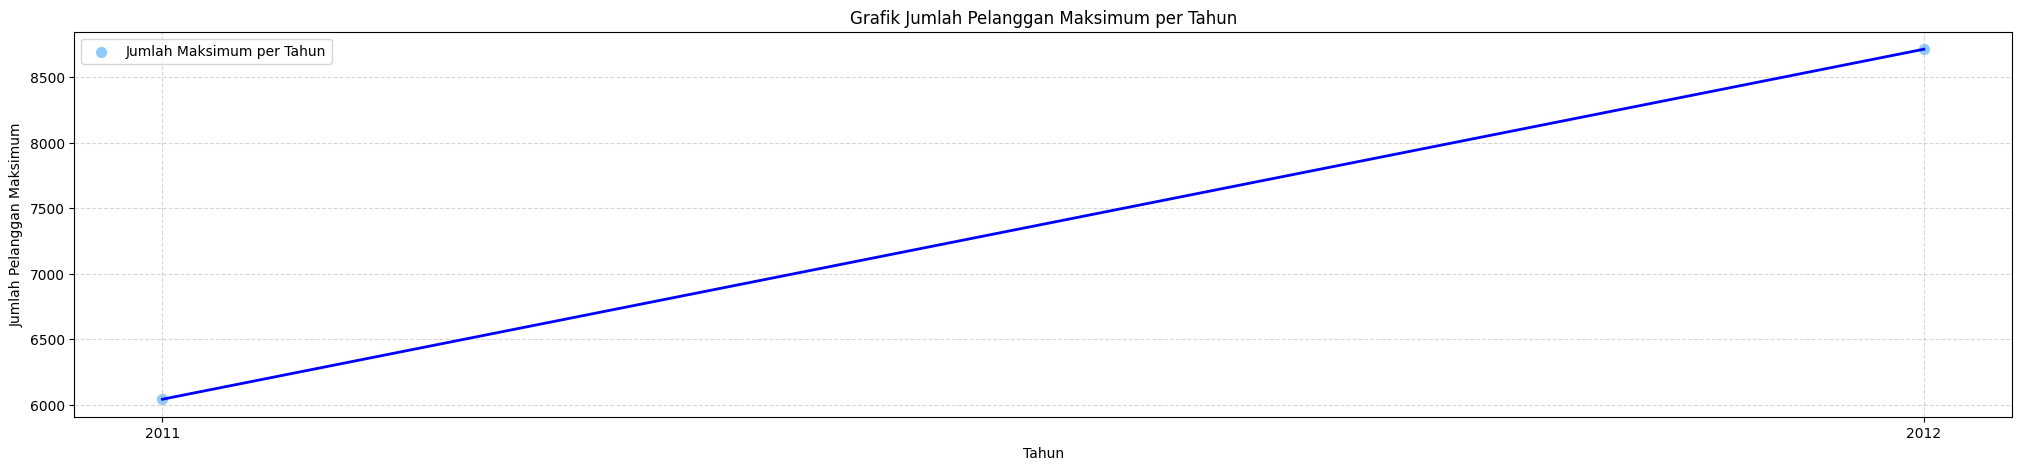

In [108]:
import matplotlib.pyplot as plt

# Set ukuran figure menjadi lebar (25, 5) untuk tampilan yang lebih luas
plt.figure(figsize=(25, 5))

# Hitung nilai maksimum jumlah pelanggan per tahun dari kolom 'count' di DataFrame 'day_df'
year_counts = day_df['count'].groupby(day_df['year']).max()

# Buat scatter plot untuk jumlah pelanggan maksimum per tahun dengan warna biru muda dan marker berbentuk 'o'
plt.scatter(year_counts.index, year_counts.values, c="#90CAF9", s=50, marker='o', label='Jumlah Maksimum per Tahun')

# Buat line plot untuk menghubungkan titik-titik pada jumlah pelanggan maksimum per tahun
plt.plot(year_counts.index, year_counts.values, color='blue', linewidth=2)

# Menambahkan label untuk sumbu X
plt.xlabel('Tahun')

# Menambahkan label untuk sumbu Y
plt.ylabel('Jumlah Pelanggan Maksimum')

# Menambahkan judul grafik
plt.title('Grafik Jumlah Pelanggan Maksimum per Tahun')

# Menampilkan legenda untuk scatter plot
plt.legend()

# Menambahkan grid dengan gaya garis putus-putus untuk memperjelas tampilan plot
plt.grid(True, linestyle='--', alpha=0.5)

# Menampilkan grafik
plt.show()


### Pertanyaan 3: Di musim apa penyewaan sepeda paling sedikit?

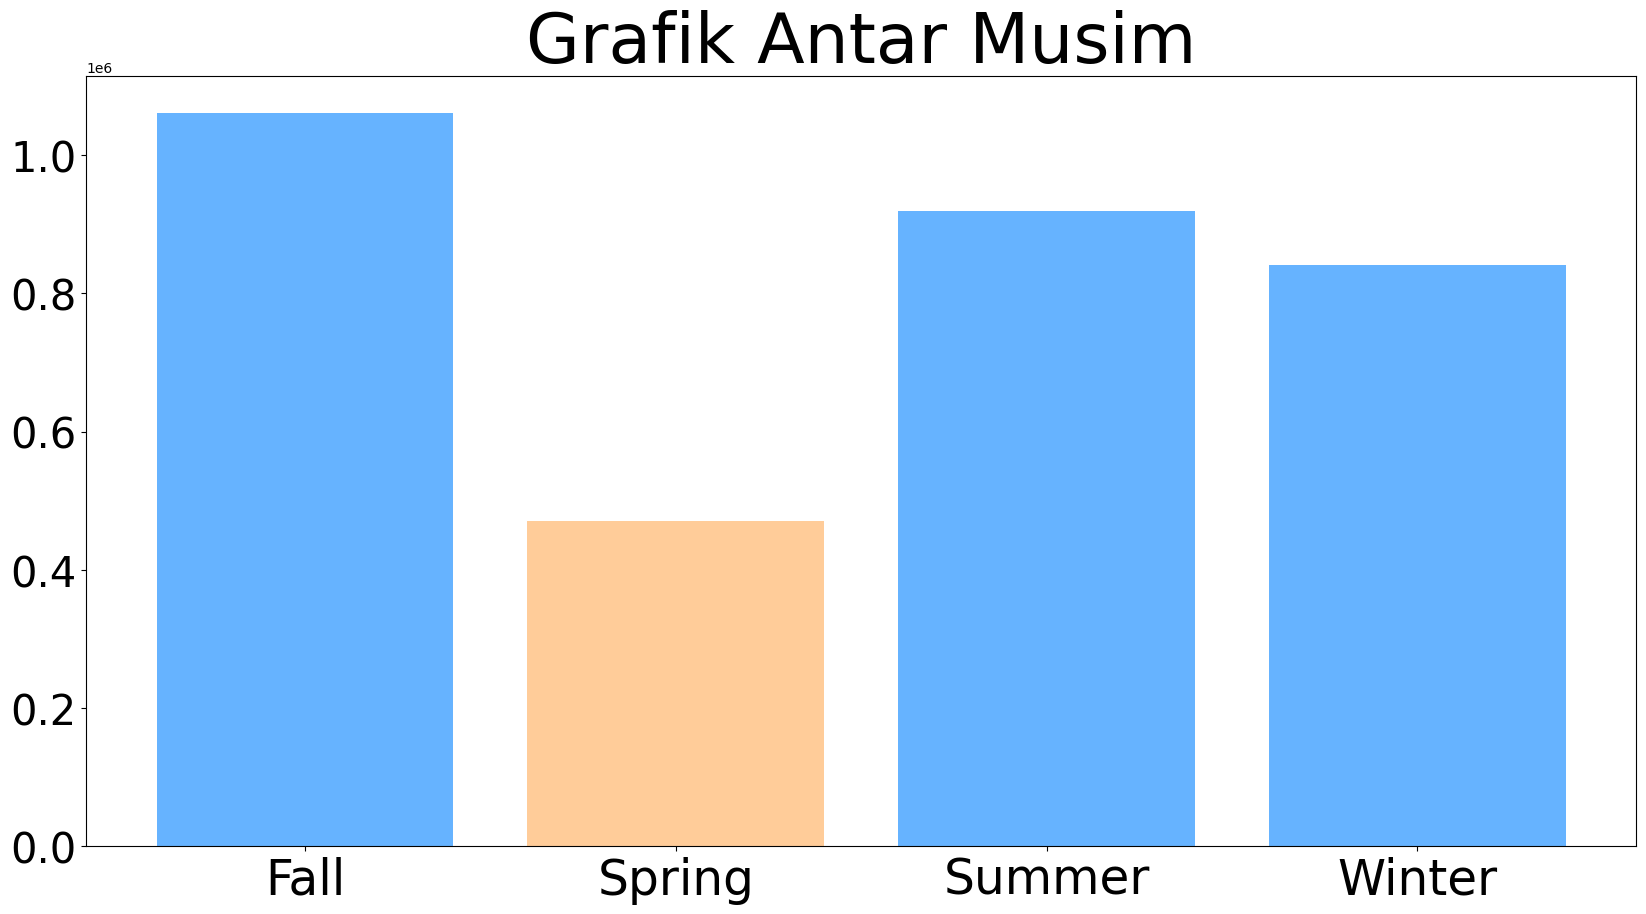

In [109]:
# Menghitung jumlah penyewaan sepeda per musim
seasonal_rentals = day_df.groupby("season")["count"].sum().reset_index()

# Mengatur warna baru
colors = ["#66B3FF", "#FFCC99","#66B3FF", "#66B3FF", ] 

# Membuat subplot dengan 1 baris dan 1 kolom, dengan ukuran (20, 10)
fig, ax = plt.subplots(figsize=(20, 10))

# Membuat bar plot manual
ax.bar(seasonal_rentals["season"], seasonal_rentals["count"], color=colors)

# Mengatur judul, label y dan x, serta tick params untuk subplot tersebut
ax.set_title("Grafik Antar Musim", loc="center", fontsize=50)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis='x', labelsize=35)
ax.tick_params(axis='y', labelsize=30)

# Menampilkan plot
plt.show()

### Pertanyaan 4: Penyewa sepeda mana yang lebih banyak, registered atau casual?

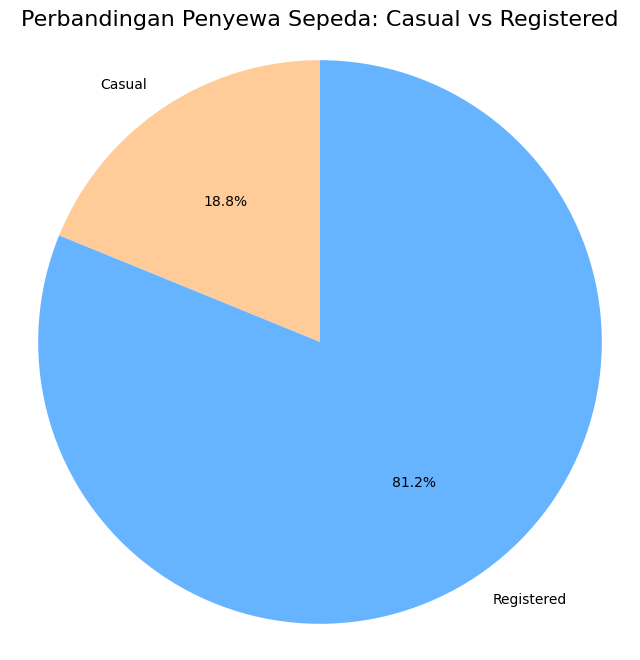

In [110]:
# Menjumlahkan semua elemen dalam kolom casual
total_casual = day_df['casual'].sum()

# Menjumlahkan semua elemen dalam kolom registered
total_registered = day_df['registered'].sum()

# Membuat data untuk pie plot
data = [total_casual, total_registered]
labels = ['Casual', 'Registered']

# Mengatur warna baru untuk pie chart
colors = ["#FFCC99", "#66B3FF"]  

# Membuat pie plot dengan ukuran dan style yang berbeda
fig, ax = plt.subplots(figsize=(8, 8))  # Mengatur ukuran plot
ax.pie(data, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)

# Mengatur agar pie chart tampak bulat
ax.axis('equal')

# Menambahkan judul
plt.title("Perbandingan Penyewa Sepeda: Casual vs Registered", fontsize=16)

# Menampilkan pie plot
plt.show()


## Conclusion

Pertanyaan:
- Di bulan apa penyewaan sepeda paling banyak dan paling sedikit?
- Bagaimana performa penyewaan sepeda dalam beberapa tahun terakhir?
- Di musim apa penyewaan sepeda paling sedikit?
- Penyewa sepeda mana yang lebih banyak, registered atau casual?

Conclusion Pertanyaan  no.1 : Bulan dengan penyewaan terbanyak adalah bulan **Agustus** dengan jumlah penyewaan 351194 dan Bulan dengan penyewaan tersediki adalah **Januari** dengan jumlah penyewaan 134933.

Conclusion Pertanyaan  no.2 : Berdasarkan visualisasi, Terjadi peningkatan yang signifikan pada pemesanan pada tahun terakhir yaitu tahun 2012

Conclusion Pertanyaan  no.3 : pada musim **Spring** terjadi penyewaan sepeda paling sedikit

Conclusion Pertanyaan  no.4 : Berdasarakan visualisasi, Penyewa sepeda **registered** lebih banyak dari casual


## Analisis Lanjutan 

Analisis Clustering

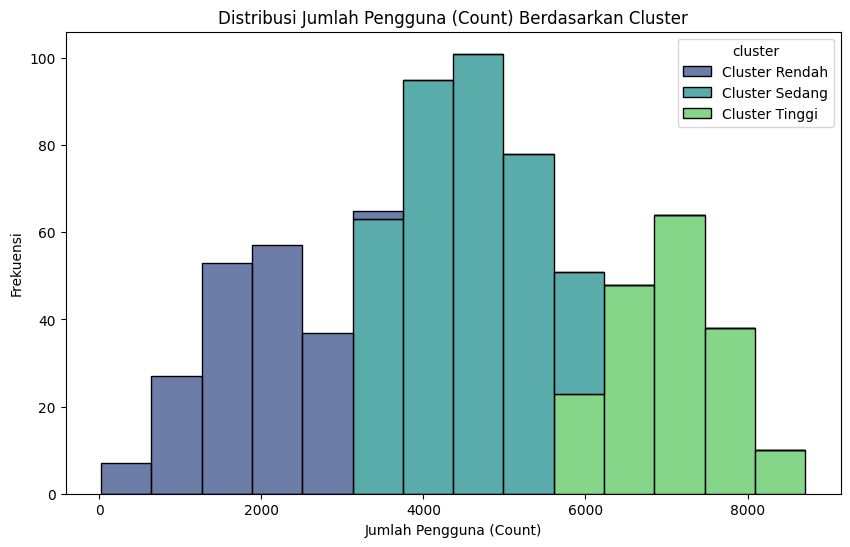

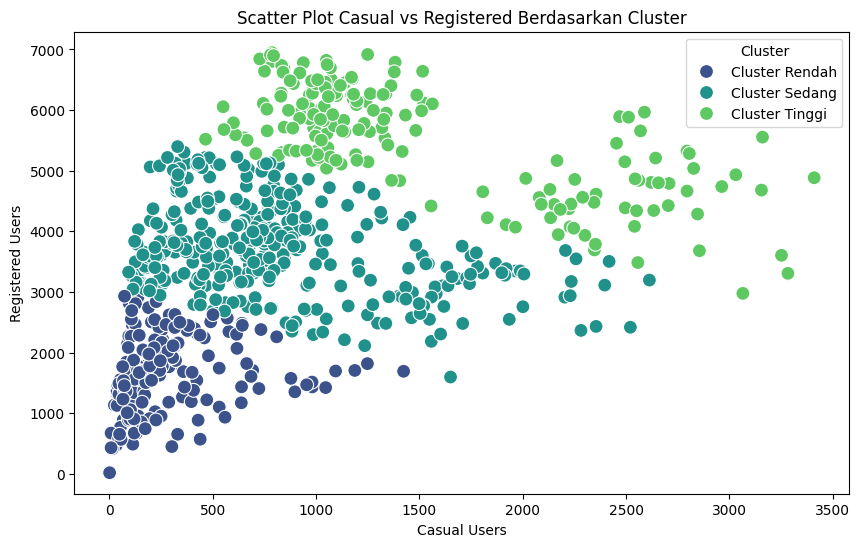

In [111]:
# Assign cluster berdasarkan nilai count di dalam day_df
def assign_cluster(count):
    if count < 3152:
        return 'Cluster Rendah'
    elif 3152 <= count <= 5956:
        return 'Cluster Sedang'
    else:
        return 'Cluster Tinggi'

# Tambahkan kolom 'cluster' ke day_df
day_df['cluster'] = day_df['count'].apply(assign_cluster)

# Visualisasi menggunakan histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=day_df, x='count', hue='cluster', multiple='stack', palette="viridis")
plt.title('Distribusi Jumlah Pengguna (Count) Berdasarkan Cluster')
plt.xlabel('Jumlah Pengguna (Count)')
plt.ylabel('Frekuensi')
plt.show()

# Visualisasi menggunakan scatter plot untuk melihat casual vs registered berdasarkan cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(data=day_df, x='casual', y='registered', hue='cluster', palette="viridis", s=100)
plt.title('Scatter Plot Casual vs Registered Berdasarkan Cluster')
plt.xlabel('Casual Users')
plt.ylabel('Registered Users')
plt.legend(title='Cluster')
plt.show()

In [112]:
day_df.to_csv("all_data.csv", index=False)